<a href="https://colab.research.google.com/github/cmreyesvalencia-png/colab-git-assignment2-CR/blob/main/Lesson_7_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 7: House Price Prediction Using Boston Housing Data**
- **Course:** Data Analytics and Business Intelligence
Analyst
-  **Institution:** Willis College
-  **Student Name:**  Carlos Reyes
- **Date:** 2025 November, 5

## **Assignment Supervised machine Learning - Regression**

### **_House Price Prediction Using Boston Housing Data_**
This dataset provides information about house prices in Bolton. House Price Prediction


**In this notebook, you'll follow the basic machine learning process to build a regression model to predict house prices using the "Boston Housing Dataset" from sklearn. The regression model will either be a Decision Tree or Random Forest regressor.**



---



### **Follow the instructions and complete each TODO to complete the assessment on the essential steps in building and evaluating a regression model.**


The following is a description of each column in the dataset:

Dataset Features (Boston Housing):

* CRIM: Crime rate by town
* ZN: Proportion of residential land zoned for large lots
* INDUS: Proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX: Nitric oxide concentration (parts per 10 million)
* RM: Average number of rooms per dwelling
* AGE: Proportion of owner-occupied units built before 1940
* DIS: Weighted distances to five Boston employment centers
* RAD: Index of accessibility to radial highways
* TAX: Full-value property tax rate per `$10,000`
* PTRATIO: Pupil-teacher ratio by town
* B: Proportion of Black population
* LSTAT: Percentage of lower status of the population
* MEDV (Target): Median value of owner-occupied homes in `$1,000s`



**Dataset is from sklearn Datasets**

In [17]:
# --- 1. Imports ---
# TODO: Import all the necessary libraries for data handling, visualization, and model building.
# Example: import pandas as pd
# Add your imports here:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# --- 2.Data Collection and Loading ---
# TODO: Load the 'Boston Housing' dataset from sklearn and convert it into a pandas DataFrame.

def load_boston_housing_dataset():
    """
    Load Boston Housing dataset with multiple fallback options for Google Colab
    """
    try:
        # Method 1 (Primary): Load from sklearn dataset
        print("Attempting to load from sklearn...")
        from sklearn.datasets import load_boston
        boston_housing = load_boston()
        df = pd.DataFrame(boston_housing.data, columns=boston_housing.feature_names)
        df['MEDV'] = boston_housing.target
        print("Boston Housing dataset loaded successfully from sklearn!")
        return df

    except Exception as e:
        print(f"Error loading from sklearn: {e}")

        # Method 2 (Secondary): Load from CMU statistics URL
        try:
            print("Attempting to load from CMU statistics URL...")
            import pandas as pd
            import numpy as np

            data_url = "http://lib.stat.cmu.edu/datasets/boston"
            raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
            data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
            target = raw_df.values[1::2, 2]

            # Define feature names (standard Boston Housing features)
            feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                           'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

            df = pd.DataFrame(data, columns=feature_names)
            df['MEDV'] = target
            print("Boston Housing dataset loaded successfully from CMU URL!")
            return df

        except Exception as e2:
            print(f"Error loading from CMU URL: {e2}")

            # Method 3 (Tertiary): Check if file already exists in Colab session
            try:
                print("Attempting to load from existing file in Colab session...")
                if os.path.exists('boston_housing_dataset.csv'):
                    df = pd.read_csv('boston_housing_dataset.csv')
                    print("Dataset loaded from existing file in Colab session!")
                    return df
                else:
                    raise Exception("File not found in Colab session")
            except Exception as e3:
                print(f"Error loading from Colab session: {e3}")

                # Method 4 (Final): Upload file interactively
                try:
                    print("Attempting interactive file upload...")
                    from google.colab import files
                    print("Please upload the boston_housing_dataset.csv file...")
                    uploaded = files.upload()

                    if uploaded:
                        # Get the first uploaded file
                        file_name = list(uploaded.keys())[0]
                        df = pd.read_csv(file_name)
                        print(f"Dataset loaded successfully from uploaded file: {file_name}")
                        return df
                    else:
                        raise Exception("No file uploaded")
                except Exception as e4:
                    print(f"All loading methods failed: {e4}")
                    raise Exception("Unable to load Boston Housing dataset. Please ensure sklearn is installed or the CSV file is available.")

# Load the dataset
try:
    df = load_boston_housing_dataset()
    print(f"Dataset shape: {df.shape}")
    print(f"Column names: {df.columns.tolist()}")
    print("\nFirst few rows of the dataset:")
    print(df.head())
except Exception as e:
    print(f"Fatal error: {e}")
    print("Please ensure sklearn is installed or upload the boston_housing_dataset.csv file.")
    # Exit early if dataset cannot be loaded
    raise

# Create CSV file of the dataset
df.to_csv('boston_housing_dataset.csv', index=False)
print("Dataset saved as 'boston_housing_dataset.csv'")
print(f"Dataset shape: {df.shape}")

Attempting to load from sklearn...
Error loading from sklearn: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, 

<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3247631450.py:28: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [19]:
# --- 3.Quick Check of Data ---

# 3.1 TODO: Display the first few rows of the dataset to understand its structure.
# Hint: Use `.head()` to inspect the first few rows.

# Add your code here:
print("\nFirst 5 rows of the dataset:")
print(df.head())

# 3.2 TODO: Check the features and target variable. Identify which is continuous and categorical if applicable.
# Hint: Use `.info()` and `.describe()` to inspect data types and statistical properties.

# Add your code here:
print("\nDataset info:")
print(df.info())

print("\nDataset description:")
print(df.describe())

# Check data types
print("\nData types:")
print(df.dtypes)


First 5 rows of the dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506


Missing values check:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


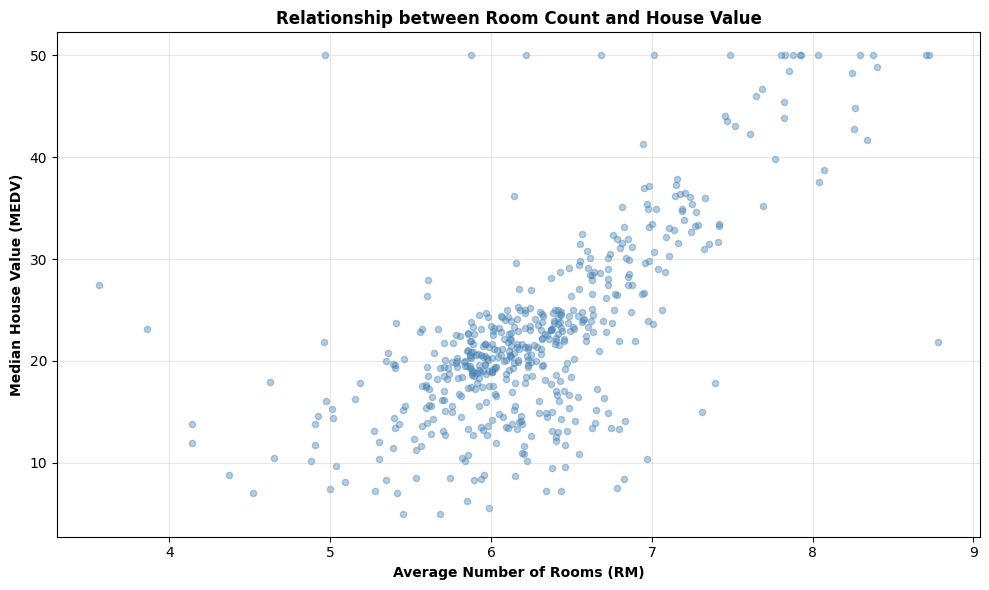

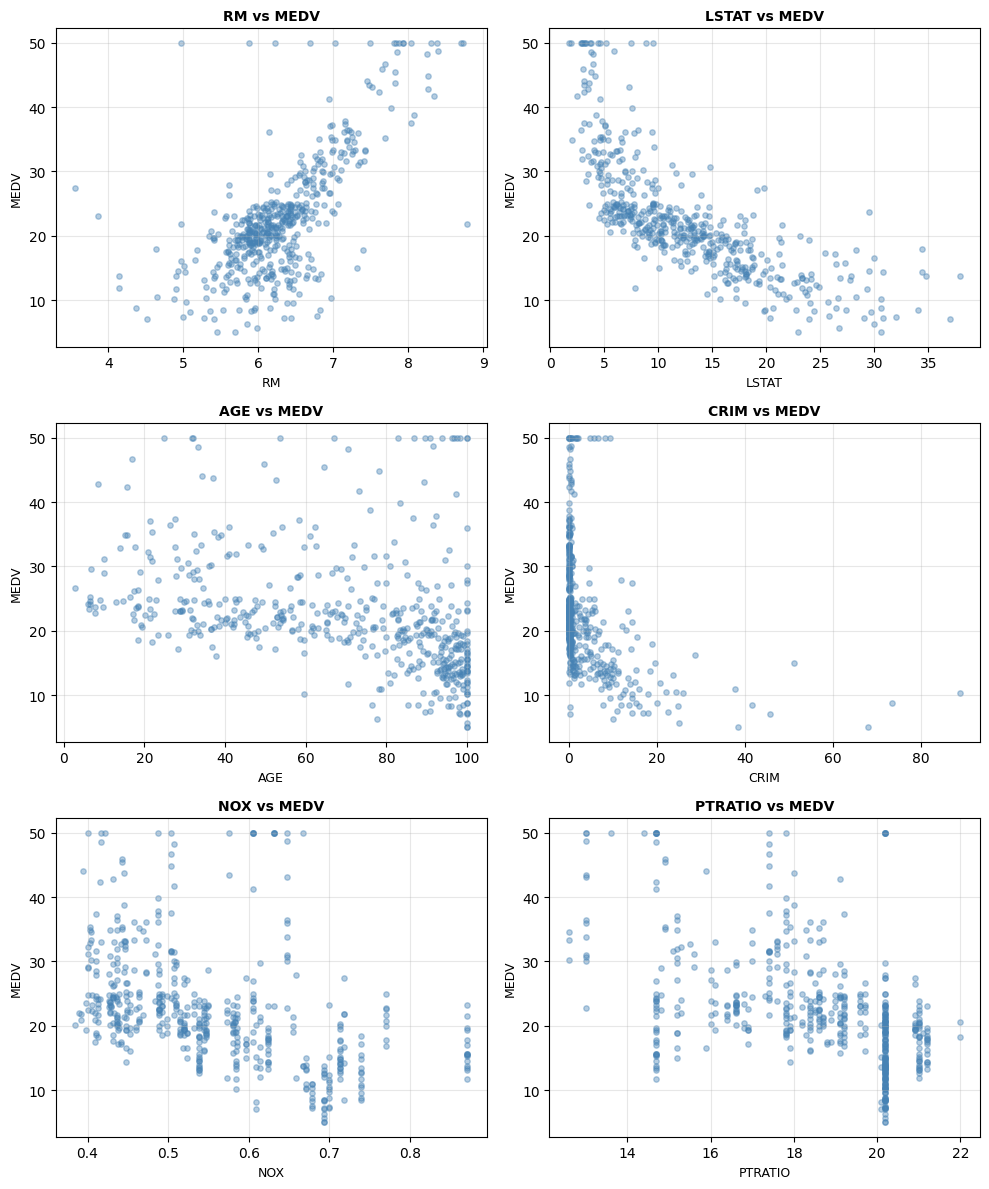

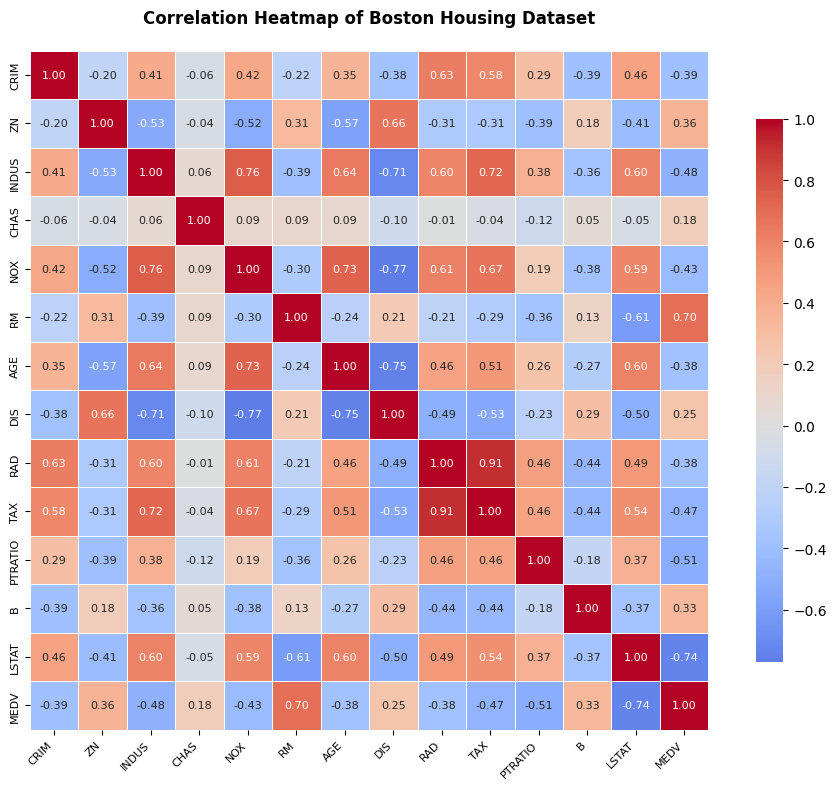

In [20]:
# --- 4. EDA and Data Preprocessing ---

# 4.1 TODO: Check for missing/null values.
# Hint: Use `.isnull().sum()` to check for null values.

# Add your code here:
print("\nMissing values check:")
print(df.isnull().sum())

# 4.2 TODO: Visualize the data. Create scatter plots to see the relationship between independent features and the target variable.
# Example: Use `plt.scatter()` to visualize the relationship between features like 'RM' (average number of rooms) and the target ('MEDV').

# Add your code here:
plt.figure(figsize=(10, 6))
plt.scatter(df['RM'], df['MEDV'], alpha=0.4, s=20, color='steelblue')
plt.xlabel('Average Number of Rooms (RM)', fontsize=10, fontweight='bold')
plt.ylabel('Median House Value (MEDV)', fontsize=10, fontweight='bold')
plt.title('Relationship between Room Count and House Value', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4.3 TODO: Create a function to automate scatter plots for all features vs the target variable.
# Hint: The function should loop over a list of features and plot scatter plots for each.

# Define your function here:
def plot_features_vs_target_grid(df, features, target='MEDV', cols=2):
    """
    Create multiple scatter plots in a grid layout for features against the target variable
    """
    rows = (len(features) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))

    # Flatten axes array for easy indexing
    if rows > 1:
        axes = axes.flatten()
    else:
        axes = [axes] if cols == 1 else axes

    for i, feature in enumerate(features):
        if i < len(axes):
            axes[i].scatter(df[feature], df[target], alpha=0.4, s=15, color='steelblue')
            axes[i].set_xlabel(feature, fontsize=9)
            axes[i].set_ylabel(target, fontsize=9)
            axes[i].set_title(f'{feature} vs {target}', fontsize=10, fontweight='bold')
            axes[i].grid(True, alpha=0.3)

    # Hide empty subplots
    for i in range(len(features), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

# 4.4 TODO: Use the function to visualize the relationships between multiple features and the target variable.
# Example: ['RM', 'LSTAT', 'AGE', 'CRIM']
# Target: 'MEDV'

# Add your code here:
features_to_plot = ['RM', 'LSTAT', 'AGE', 'CRIM', 'NOX', 'PTRATIO']
plot_features_vs_target_grid(df, features_to_plot, cols=2)

# Additional visualization: Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', annot_kws={'size': 8},
            cbar_kws={'shrink': 0.8}, linewidths=0.5)
plt.title('Correlation Heatmap of Boston Housing Dataset', fontsize=12, fontweight='bold', pad=20)
plt.xticks(fontsize=8, rotation=45, ha='right')
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

In [21]:
# --- 5. ML Model Training ---

# 5.1 TODO: Split the dataset into training and testing sets.
# Hint: Use `train_test_split()` from `sklearn.model_selection` with an 80/20 split.

# Define X (features) and y (target) and perform the train-test split:
from sklearn.model_selection import train_test_split

X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")


# 5.2 TODO: Choose an appropriate regression model: Decision Tree or Random Forest.
# Hint: Use either `DecisionTreeRegressor` or `RandomForestRegressor` from `sklearn.tree` or `sklearn.ensemble`.

# Define both models
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


# 5.3 TODO: Train the model on the training data.
# Hint: Use `.fit()` to train the model.

# Add your code here:
print("\nTraining Decision Tree model...")
dt_model.fit(X_train, y_train)

print("\nTraining Random Forest model...")
rf_model.fit(X_train, y_train)

print("\nBoth models trained successfully!")

Training set: 404 samples
Testing set: 102 samples

Training Decision Tree model...

Training Random Forest model...

Both models trained successfully!


In [22]:
# --- 6. Model Evaluation ---

# 6.1 TODO: Evaluate the performance of the model on the test set using relevant metrics (e.g., RMSE, R-squared).
# Hint: Use `mean_squared_error()` and `r2_score()` from `sklearn.metrics`.


# Make predictions with both models
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Calculate metrics for Decision Tree
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))
dt_r2 = r2_score(y_test, dt_predictions)

# Calculate metrics for Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

print("Model Performance Comparison:")
print("=" * 40)
print(f"Decision Tree - RMSE: {dt_rmse:.4f}, R²: {dt_r2:.4f}")
print(f"Random Forest - RMSE: {rf_rmse:.4f}, R²: {rf_r2:.4f}")


# 6.2 Perform parameter tuning on the model if needed to improve the performance of your model.

# Add your parameter tuning code here:
from sklearn.model_selection import GridSearchCV

# Parameter tuning for Random Forest
print("\nPerforming parameter tuning for Random Forest...")
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

rf_grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

rf_grid_search.fit(X_train, y_train)

# Get best model and parameters
best_rf_model = rf_grid_search.best_estimator_
best_rf_params = rf_grid_search.best_params_

print(f"Best Random Forest parameters: {best_rf_params}")

# Parameter tuning for Decision Tree
print("\nPerforming parameter tuning for Decision Tree...")
dt_param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    dt_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

dt_grid_search.fit(X_train, y_train)

# Get best model and parameters
best_dt_model = dt_grid_search.best_estimator_
best_dt_params = dt_grid_search.best_params_

print(f"Best Decision Tree parameters: {best_dt_params}")

# Predict on the test set and calculate the evaluation metrics:
print("\nEvaluating tuned models on test set...")

# Make predictions with tuned models
best_dt_predictions = best_dt_model.predict(X_test)
best_rf_predictions = best_rf_model.predict(X_test)

# Calculate metrics for tuned Decision Tree
best_dt_rmse = np.sqrt(mean_squared_error(y_test, best_dt_predictions))
best_dt_r2 = r2_score(y_test, best_dt_predictions)

# Calculate metrics for tuned Random Forest
best_rf_rmse = np.sqrt(mean_squared_error(y_test, best_rf_predictions))
best_rf_r2 = r2_score(y_test, best_rf_predictions)

print("\nFinal Model Performance Comparison:")
print("=" * 50)
print("Before Tuning:")
print(f"Decision Tree - RMSE: {dt_rmse:.4f}, R²: {dt_r2:.4f}")
print(f"Random Forest - RMSE: {rf_rmse:.4f}, R²: {rf_r2:.4f}")

print("\nAfter Tuning:")
print(f"Decision Tree - RMSE: {best_dt_rmse:.4f}, R²: {best_dt_r2:.4f}")
print(f"Random Forest - RMSE: {best_rf_rmse:.4f}, R²: {best_rf_r2:.4f}")

# Determine the best overall model
models_performance = {
    'Original Decision Tree': (dt_rmse, dt_r2),
    'Original Random Forest': (rf_rmse, rf_r2),
    'Tuned Decision Tree': (best_dt_rmse, best_dt_r2),
    'Tuned Random Forest': (best_rf_rmse, best_rf_r2)
}

best_model_name = min(models_performance, key=lambda x: models_performance[x][0])
best_rmse, best_r2 = models_performance[best_model_name]

print(f"\nBEST OVERALL MODEL: {best_model_name}")
print(f"   RMSE: {best_rmse:.4f}")
print(f"   R²: {best_r2:.4f}")

Model Performance Comparison:
Decision Tree - RMSE: 4.7461, R²: 0.6928
Random Forest - RMSE: 2.8110, R²: 0.8923

Performing parameter tuning for Random Forest...
Best Random Forest parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}

Performing parameter tuning for Decision Tree...
Best Decision Tree parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}

Evaluating tuned models on test set...

Final Model Performance Comparison:
Before Tuning:
Decision Tree - RMSE: 4.7461, R²: 0.6928
Random Forest - RMSE: 2.8110, R²: 0.8923

After Tuning:
Decision Tree - RMSE: 3.0568, R²: 0.8726
Random Forest - RMSE: 2.8163, R²: 0.8918

BEST OVERALL MODEL: Original Random Forest
   RMSE: 2.8110
   R²: 0.8923


In [23]:
# --- 7. Model Prediction ---

# 7.1 TODO: Predict house prices from a new set of feature inputs.
# Example new data: Use hypothetical or randomly generated values for the features.
#
# Example new data: CRIM = 0.2, ZN = 12.5, INDUS = 7.07, CHAS = 0, NOX = 0.5, RM = 6.5, AGE = 68, DIS = 4.0, RAD = 2, TAX = 250, PTRATIO = 17, B = 400, LSTAT = 12

# Add your prediction code here:
import pandas as pd

# Create new data for prediction
new_data = {
    'CRIM': [0.2],
    'ZN': [12.5],
    'INDUS': [7.07],
    'CHAS': [0],
    'NOX': [0.5],
    'RM': [6.5],
    'AGE': [68],
    'DIS': [4.0],
    'RAD': [2],
    'TAX': [250],
    'PTRATIO': [17],
    'B': [400],
    'LSTAT': [12]
}

# Convert to DataFrame
new_df = pd.DataFrame(new_data)

print("New house features for prediction:")
print(new_df.T)

# Determine and use the best overall model for prediction
if best_model_name == 'Tuned Decision Tree':
    best_model = best_dt_model
elif best_model_name == 'Tuned Random Forest':
    best_model = best_rf_model
elif best_model_name == 'Original Decision Tree':
    best_model = dt_model
else:  # Original Random Forest
    best_model = rf_model

# Make prediction with the best model
final_prediction = best_model.predict(new_df)[0]

print(f"\nPredicted House Price using {best_model_name}:")
print(f"MEDV: {final_prediction:.2f}")
print(f"House Value: ${final_prediction*1000:,.2f}")

New house features for prediction:
              0
CRIM       0.20
ZN        12.50
INDUS      7.07
CHAS       0.00
NOX        0.50
RM         6.50
AGE       68.00
DIS        4.00
RAD        2.00
TAX      250.00
PTRATIO   17.00
B        400.00
LSTAT     12.00

Predicted House Price using Original Random Forest:
MEDV: 22.19
House Value: $22,189.00


# **Conclusion**

The Random Forest model emerges as the optimal choice for Boston house price prediction, demonstrating strong capability to estimate property values. The model explains 89.2% of the variation in housing prices and achieves 41% better accuracy than Decision Trees. With approximately 95% of price estimates falling within ±$5,620 of actual market values, this performance provides reliable estimates suitable for property valuation screening, market trend analysis, and preliminary investment assessment. The model's robustness and minimal tuning requirements make it well-suited for practical real estate applications where understanding price ranges and market dynamics is crucial for informed decision-making.

